Binary Step: 1 0
Linear: 20 -4
Sigmoid: 0.9933 0.2689
Tanh: 0.9999 -0.7616
ReLU: 5 0
Leaky ReLU: 5 -0.01
Softmax on [5,-1]: [0.99752738 0.00247262]


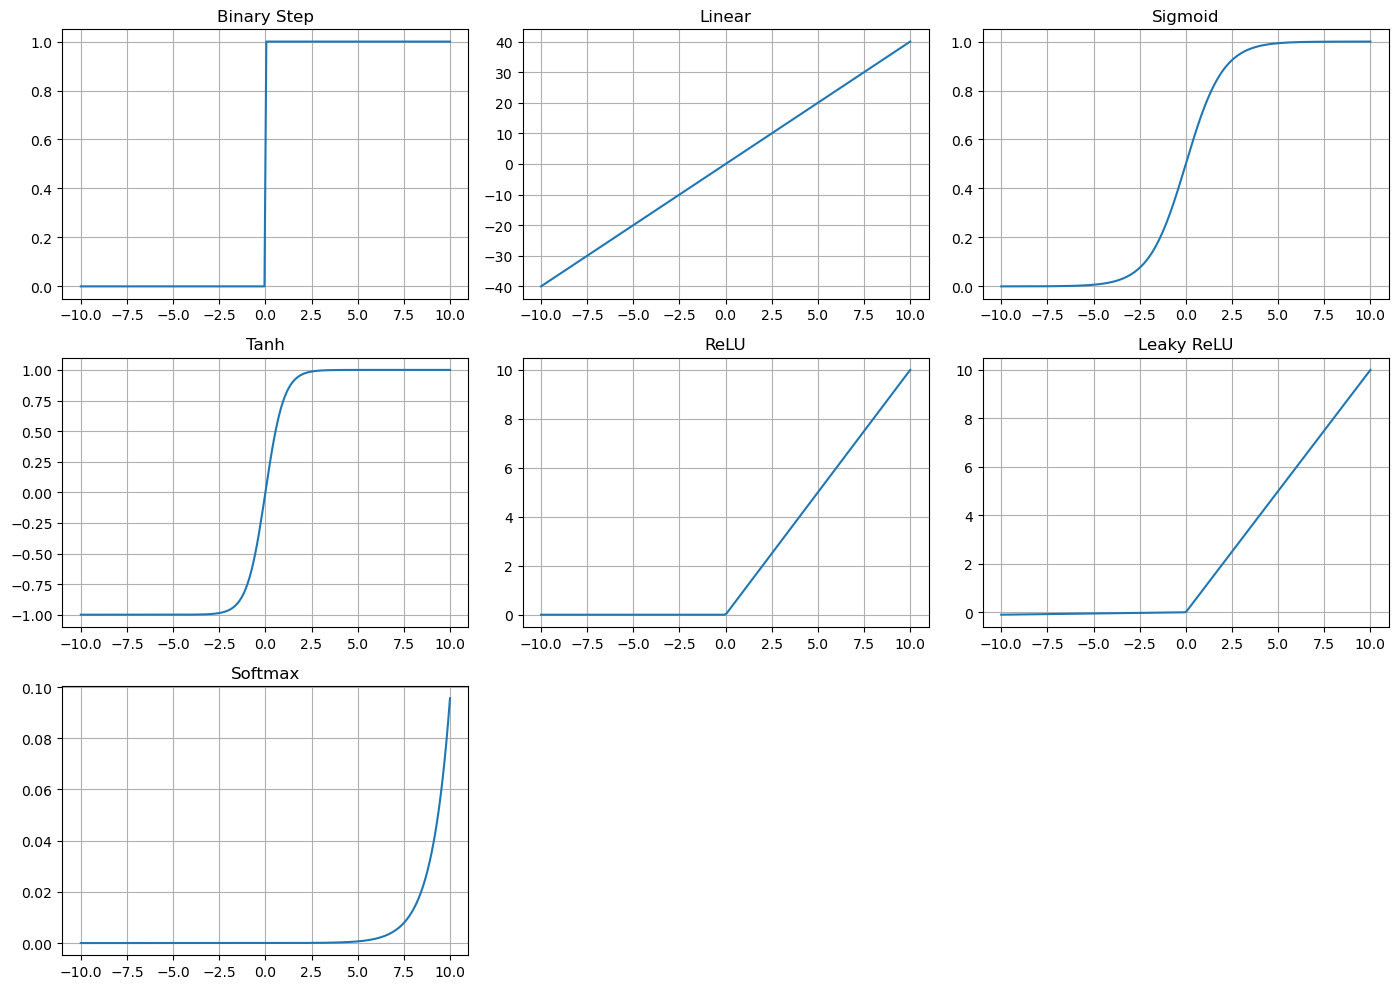

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Activation Functions ---
def binary_step(x):
    return 0 if x < 0 else 1

def linear_function(x):
    return 4 * x

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def tanh_activation(x):
    return math.tanh(x)

def relu(x):
    return x if x > 0 else 0

def leaky_relu(x):
    return x if x > 0 else 0.01 * x

def softmax(x):
    exp_scores = np.exp(x - np.max(x))
    return exp_scores / np.sum(exp_scores)

# --- Test outputs for sample values ---
print("Binary Step:", binary_step(5), binary_step(-1))
print("Linear:", linear_function(5), linear_function(-1))
print("Sigmoid:", round(sigmoid(5),4), round(sigmoid(-1),4))
print("Tanh:", round(tanh_activation(5),4), round(tanh_activation(-1),4))
print("ReLU:", relu(5), relu(-1))
print("Leaky ReLU:", leaky_relu(5), leaky_relu(-1))
print("Softmax on [5,-1]:", softmax(np.array([5,-1])))

# --- Range for plotting ---
x = np.linspace(-10, 10, 200)

# Compute outputs over range
y_binary = np.array([binary_step(val) for val in x])
y_linear = np.array([linear_function(val) for val in x])
y_sigmoid = 1 / (1 + np.exp(-x))  # vectorized
y_tanh = np.tanh(x)
y_relu = np.maximum(0, x)
y_leaky = np.where(x > 0, x, 0.01 * x)
y_softmax = softmax(x)

# --- Plot graphs ---
plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plt.plot(x, y_binary)
plt.title("Binary Step")
plt.grid(True)

plt.subplot(3, 3, 2)
plt.plot(x, y_linear)
plt.title("Linear")
plt.grid(True)

plt.subplot(3, 3, 3)
plt.plot(x, y_sigmoid)
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(3, 3, 4)
plt.plot(x, y_tanh)
plt.title("Tanh")
plt.grid(True)

plt.subplot(3, 3, 5)
plt.plot(x, y_relu)
plt.title("ReLU")
plt.grid(True)

plt.subplot(3, 3, 6)
plt.plot(x, y_leaky)
plt.title("Leaky ReLU")
plt.grid(True)

plt.subplot(3, 3, 7)
plt.plot(x, y_softmax)
plt.title("Softmax")
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
import numpy as np

class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand()

    def activate(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Apply activation function (sigmoid)
        activation = self.sigmoid(weighted_sum)
        return activation

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, inputs, target_output, learning_rate):
        actual_output = self.activate(inputs)
        error = target_output - actual_output
        self.weights += learning_rate * error * inputs
        self.bias += learning_rate * error


if __name__ == "__main__":
    num_inputs = 3
    neuron = Neuron(num_inputs)

    X_train = np.array([
        [0, 0, 1],
        [1, 1, 1],
        [1, 0, 1],
        [0, 1, 1]
    ])
    y_train = np.array([0, 1, 1, 0])

    learning_rate = 0.1
    num_iterations = 10000

    for i in range(num_iterations):
        index = np.random.randint(len(X_train))
        inputs = X_train[index]
        target_output = y_train[index]
        neuron.train(inputs, target_output, learning_rate)

    test_data = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    for inputs in test_data:
        output = neuron.activate(inputs)
        print("Input:", inputs, "Output:", output)

Input: [0 0 1] Output: 0.005487499910447481
Input: [1 1 1] Output: 0.9953807149427562
Input: [1 0 1] Output: 0.996264768247183
Input: [0 1 1] Output: 0.004438025768472423
